#Decsion tree handson (heart_data_set)

---



In [ ]:
# Dataset link: https://drive.google.com/file/d/10b67wvQs-acIZXwlJB4Gbk3BpvMoyN90/view?usp=sharing

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
data=pd.read_csv('heart.csv')

In [ ]:
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [ ]:
data.isnull().sum()

,0
age,0
sex,0
cp,0
trestbps,0
chol,0
fbs,0
restecg,0
thalach,0
exang,0
oldpeak,0


In [ ]:
data.duplicated().sum()

np.int64(1)

In [ ]:
data.drop_duplicates(inplace=True)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 302 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       302 non-null    int64  
 1   sex       302 non-null    int64  
 2   cp        302 non-null    int64  
 3   trestbps  302 non-null    int64  
 4   chol      302 non-null    int64  
 5   fbs       302 non-null    int64  
 6   restecg   302 non-null    int64  
 7   thalach   302 non-null    int64  
 8   exang     302 non-null    int64  
 9   oldpeak   302 non-null    float64
 10  slope     302 non-null    int64  
 11  ca        302 non-null    int64  
 12  thal      302 non-null    int64  
 13  target    302 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 35.4 KB


#here we we do not remove outliers because in health sector we should not neglect the data


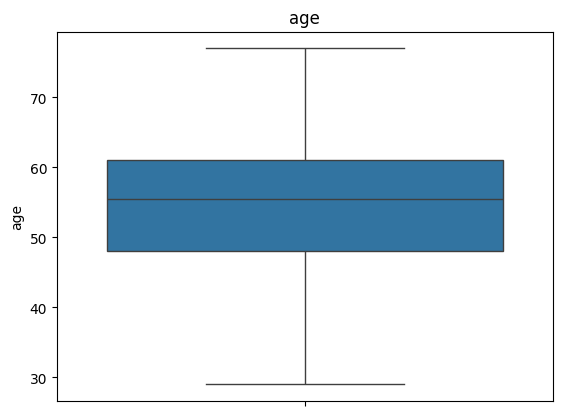

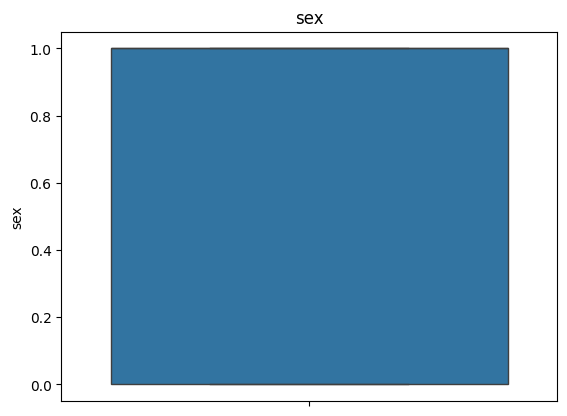

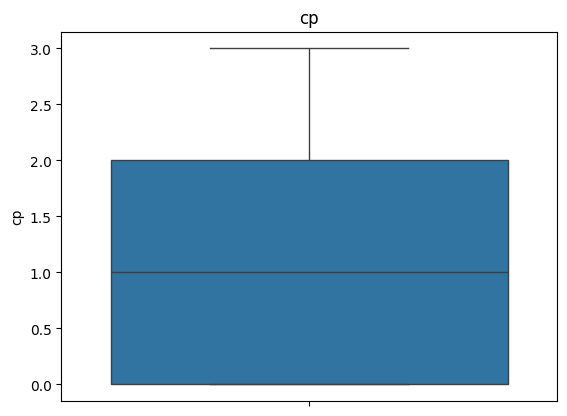

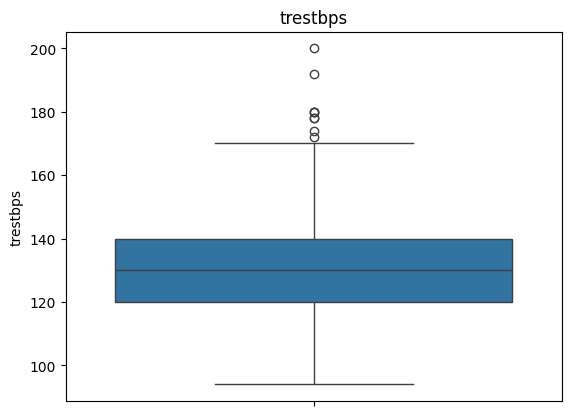

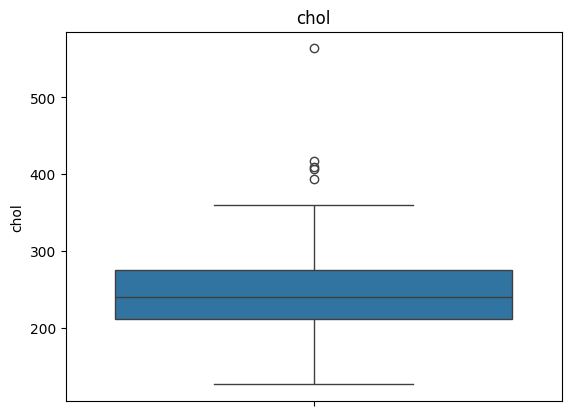

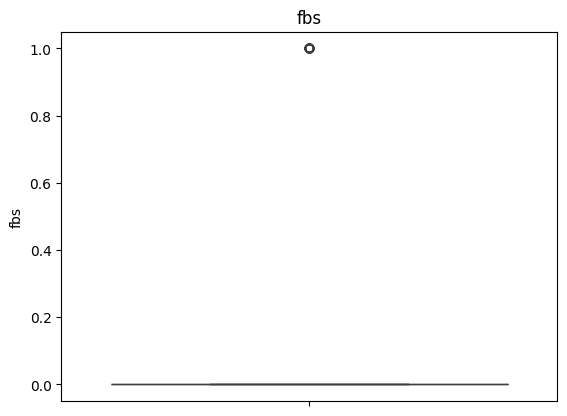

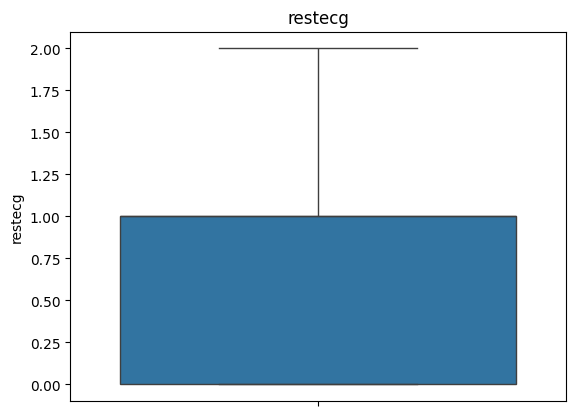

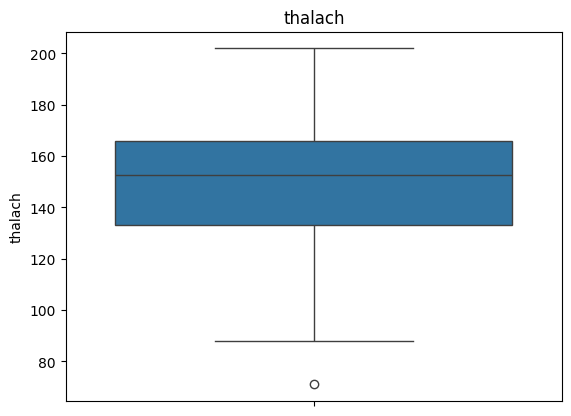

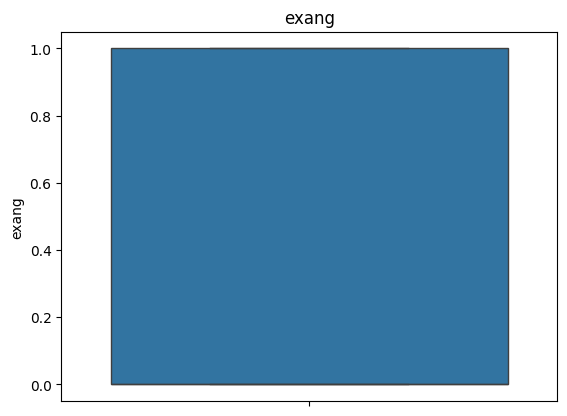

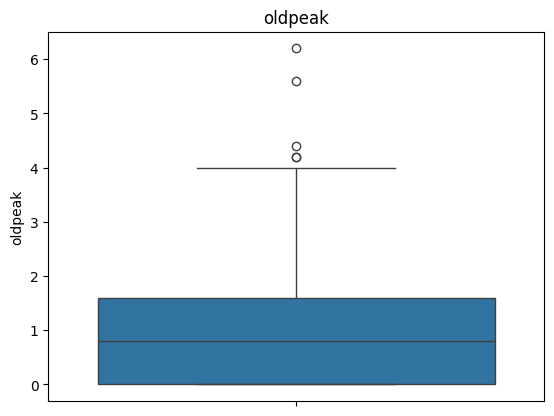

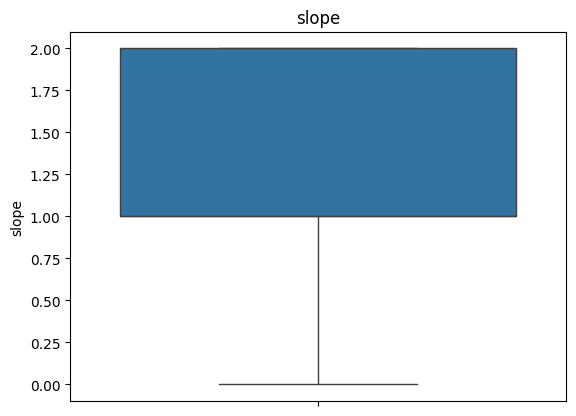

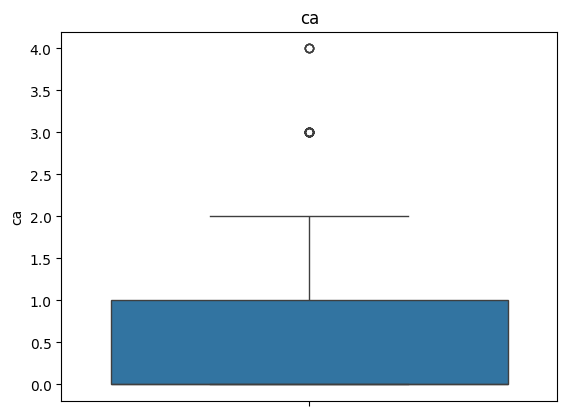

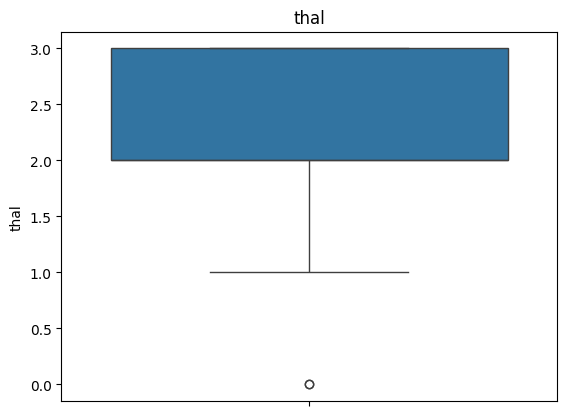

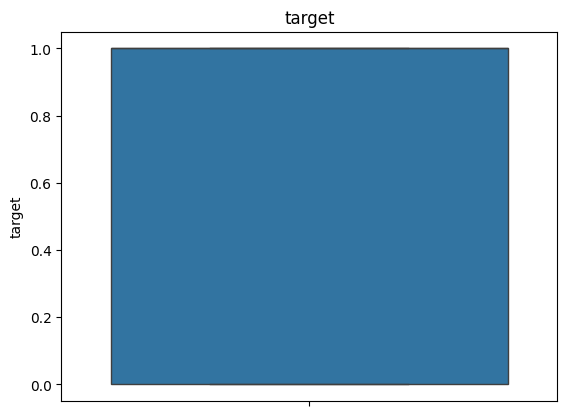

In [ ]:
for col in data.columns:
  sns.boxplot(data[col])
  plt.title(col)
  plt.show()

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split


In [ ]:
x=data.drop(columns='target')
y=data['target']

In [ ]:
x_test, x_train, y_test, y_train=train_test_split(x,y,test_size=0.2,random_state=60)


In [ ]:
d_tree=DecisionTreeClassifier()
d_tree.fit(x_train,y_train)

DecisionTreeClassifier()

In [ ]:
ytrain_pred=d_tree.predict(x_train)
ytrain_pred

array([1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0,
       1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0,
       1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0])

In [ ]:
y_test

,target
255,0
222,0
35,1
273,0
230,0
...,...
72,1
99,1
70,1
65,1


In [ ]:
y_train

,target
150,1
90,1
101,1
15,1
33,1
...,...
138,1
262,0
149,1
23,1


In [ ]:
pd.DataFrame({'actual': y_train, 'predicted': ytrain_pred})

,actual,predicted
150,1,1
90,1,1
101,1,1
15,1,1
33,1,1
...,...,...
138,1,1
262,0,0
149,1,1
23,1,1


In [ ]:
from sklearn.metrics import *
accuracy_score(y_train,ytrain_pred)

1.0

#If accuracy is 100% means it is over fitted so we have to choose moderate one's

<Axes: >

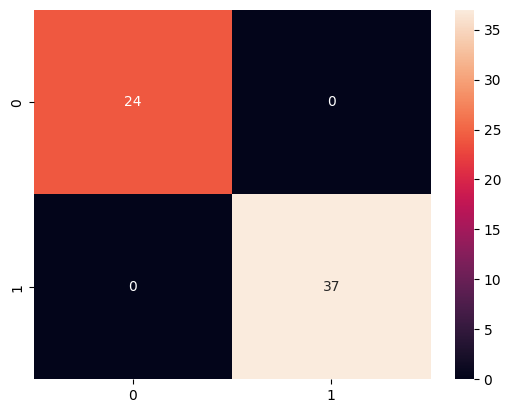

In [ ]:
cf=confusion_matrix(ytrain_pred,y_train)
sns.heatmap(cf,annot=True)

#how to choose moderate one's?

In [ ]:
depth=(1,2,3,4,5,6,7,8,9,10)
for max_d in depth:
  d_tree1=DecisionTreeClassifier(max_depth=max_d, random_state=60)
  d_tree1.fit(x_train,y_train)
  y_train_pred=d_tree1.predict(x_train)
  acc=accuracy_score(y_train, y_train_pred)
  print(f"accuracy for the max depth of {max_d} is {acc} ")

accuracy for the max depth of 1 is 0.7868852459016393 
accuracy for the max depth of 2 is 0.8524590163934426 
accuracy for the max depth of 3 is 0.9344262295081968 
accuracy for the max depth of 4 is 0.9672131147540983 
accuracy for the max depth of 5 is 1.0 
accuracy for the max depth of 6 is 1.0 
accuracy for the max depth of 7 is 1.0 
accuracy for the max depth of 8 is 1.0 
accuracy for the max depth of 9 is 1.0 
accuracy for the max depth of 10 is 1.0 


In [ ]:
final_dtree=DecisionTreeClassifier(max_depth=3, random_state=60)
final_dtree.fit(x_train,y_train)
y_train_pred=final_dtree.predict(x_train)
acc=accuracy_score(y_train_pred,y_train)
acc

0.9344262295081968

#visualizing the tree.

In [ ]:
from sklearn.tree import plot_tree

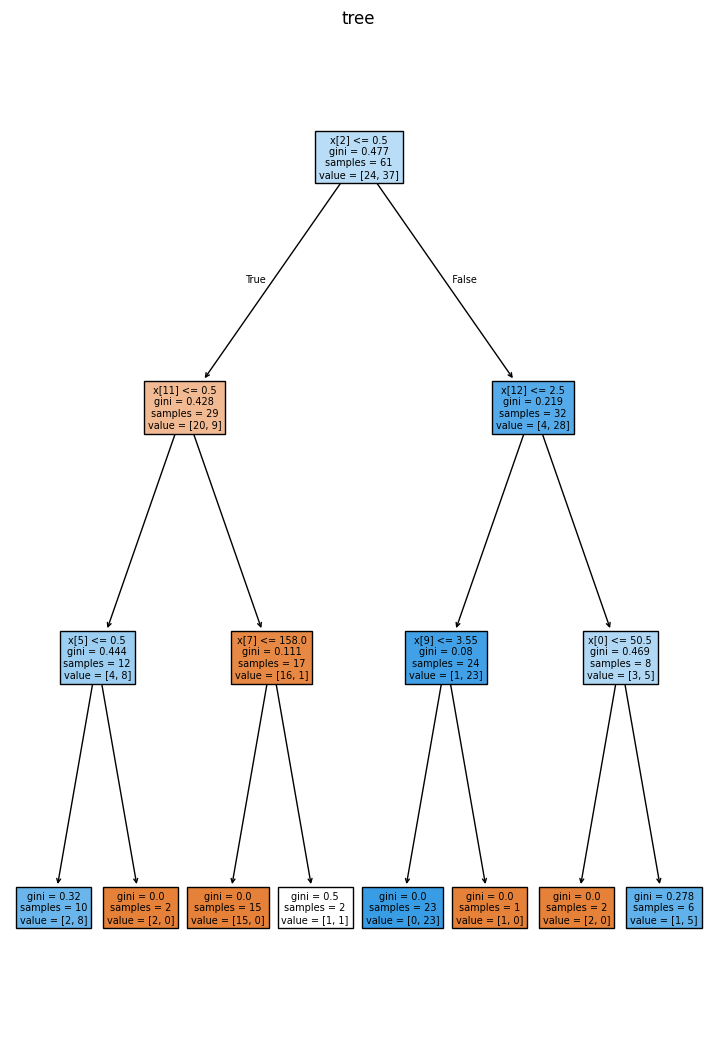

In [ ]:
plt.figure(figsize=(9,13))
plot_tree(final_dtree,filled=True)
plt.title('tree')
plt.show()

first line: x[2]<=0.5 -> splitting condition; each node checks one feature and splits data into 2 groups, which feature and threshold(like 0.5) are chosen automatically by the algorithm to maximize purity

second line: gini=0.49 -> gini entropy of that node(how mixed the classes are)

Gini impurity: 0=node is pure, close to 0.5(mixed/impure)
third line: samples=211 -> node has 211 data points(or rows) from the dataset

fourth line: value=[96,115] -> how many samples belong to each class in this node

96 belongs to class 0
115 belong to class 1